In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
from scipy import stats

register_matplotlib_converters()

In [2]:
def to_timestamp(date):
    return date.timestamp()

def extract_rating(text):
    r = r'(\d+(\.\d+)?)/10'
    m = re.search(r, text)
    return float(m.group(0)[:-3]) if m else None


In [3]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])

data['timestamp'] = data['created_at'].apply(to_timestamp)
data['rating'] = data['text'].apply(extract_rating)
data = data[(data['rating'].notnull()) & (data['rating'] < 25.0)]

fit = stats.linregress(data['timestamp'], data['rating'])
data['prediction'] = fit.intercept + fit.slope*data['timestamp']

In [4]:
data

,id,created_at,text,timestamp,rating,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,1.525910e+09,14.0,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,1.525797e+09,13.0,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,1.525735e+09,14.0,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,1.525394e+09,13.0,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,1.525285e+09,13.0,13.163804
35,991399795892916224,2018-05-01 19:31:45,This is B-Mo. He has a heart on his butt and h...,1.525203e+09,13.0,13.160918
41,990987750601093120,2018-04-30 16:14:26,Say hello to Meatball. I’m told he actually lo...,1.525105e+09,13.0,13.157464
50,989657223084244992,2018-04-27 00:07:23,This is Oakley. He picked you some flowers. Ho...,1.524788e+09,14.0,13.146311
55,989300750152069120,2018-04-26 00:30:53,Meet Max. She pouts until someone holds her. A...,1.524703e+09,12.0,13.143323
59,989176681243070464,2018-04-25 16:17:53,This is Trout. He lives a life of luxury. Prob...,1.524673e+09,13.0,13.142283


In [5]:
fit.slope, fit.intercept

(3.515929974847721e-08, -40.46415480898916)

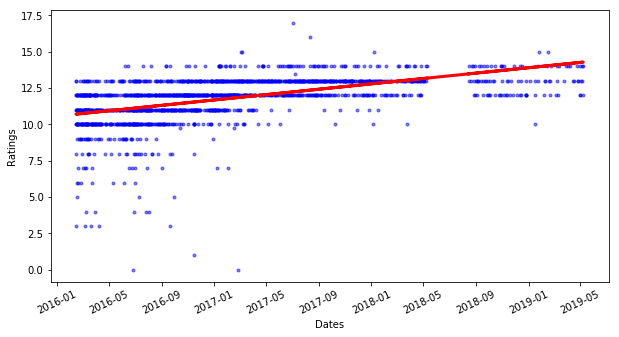

In [6]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=25)
plt.xlabel('Dates')
plt.ylabel('Ratings')
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()
